In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:

# Define a smoothing function
def smooth_data(data, window_size=100):
    return data.rolling(window=window_size).mean()

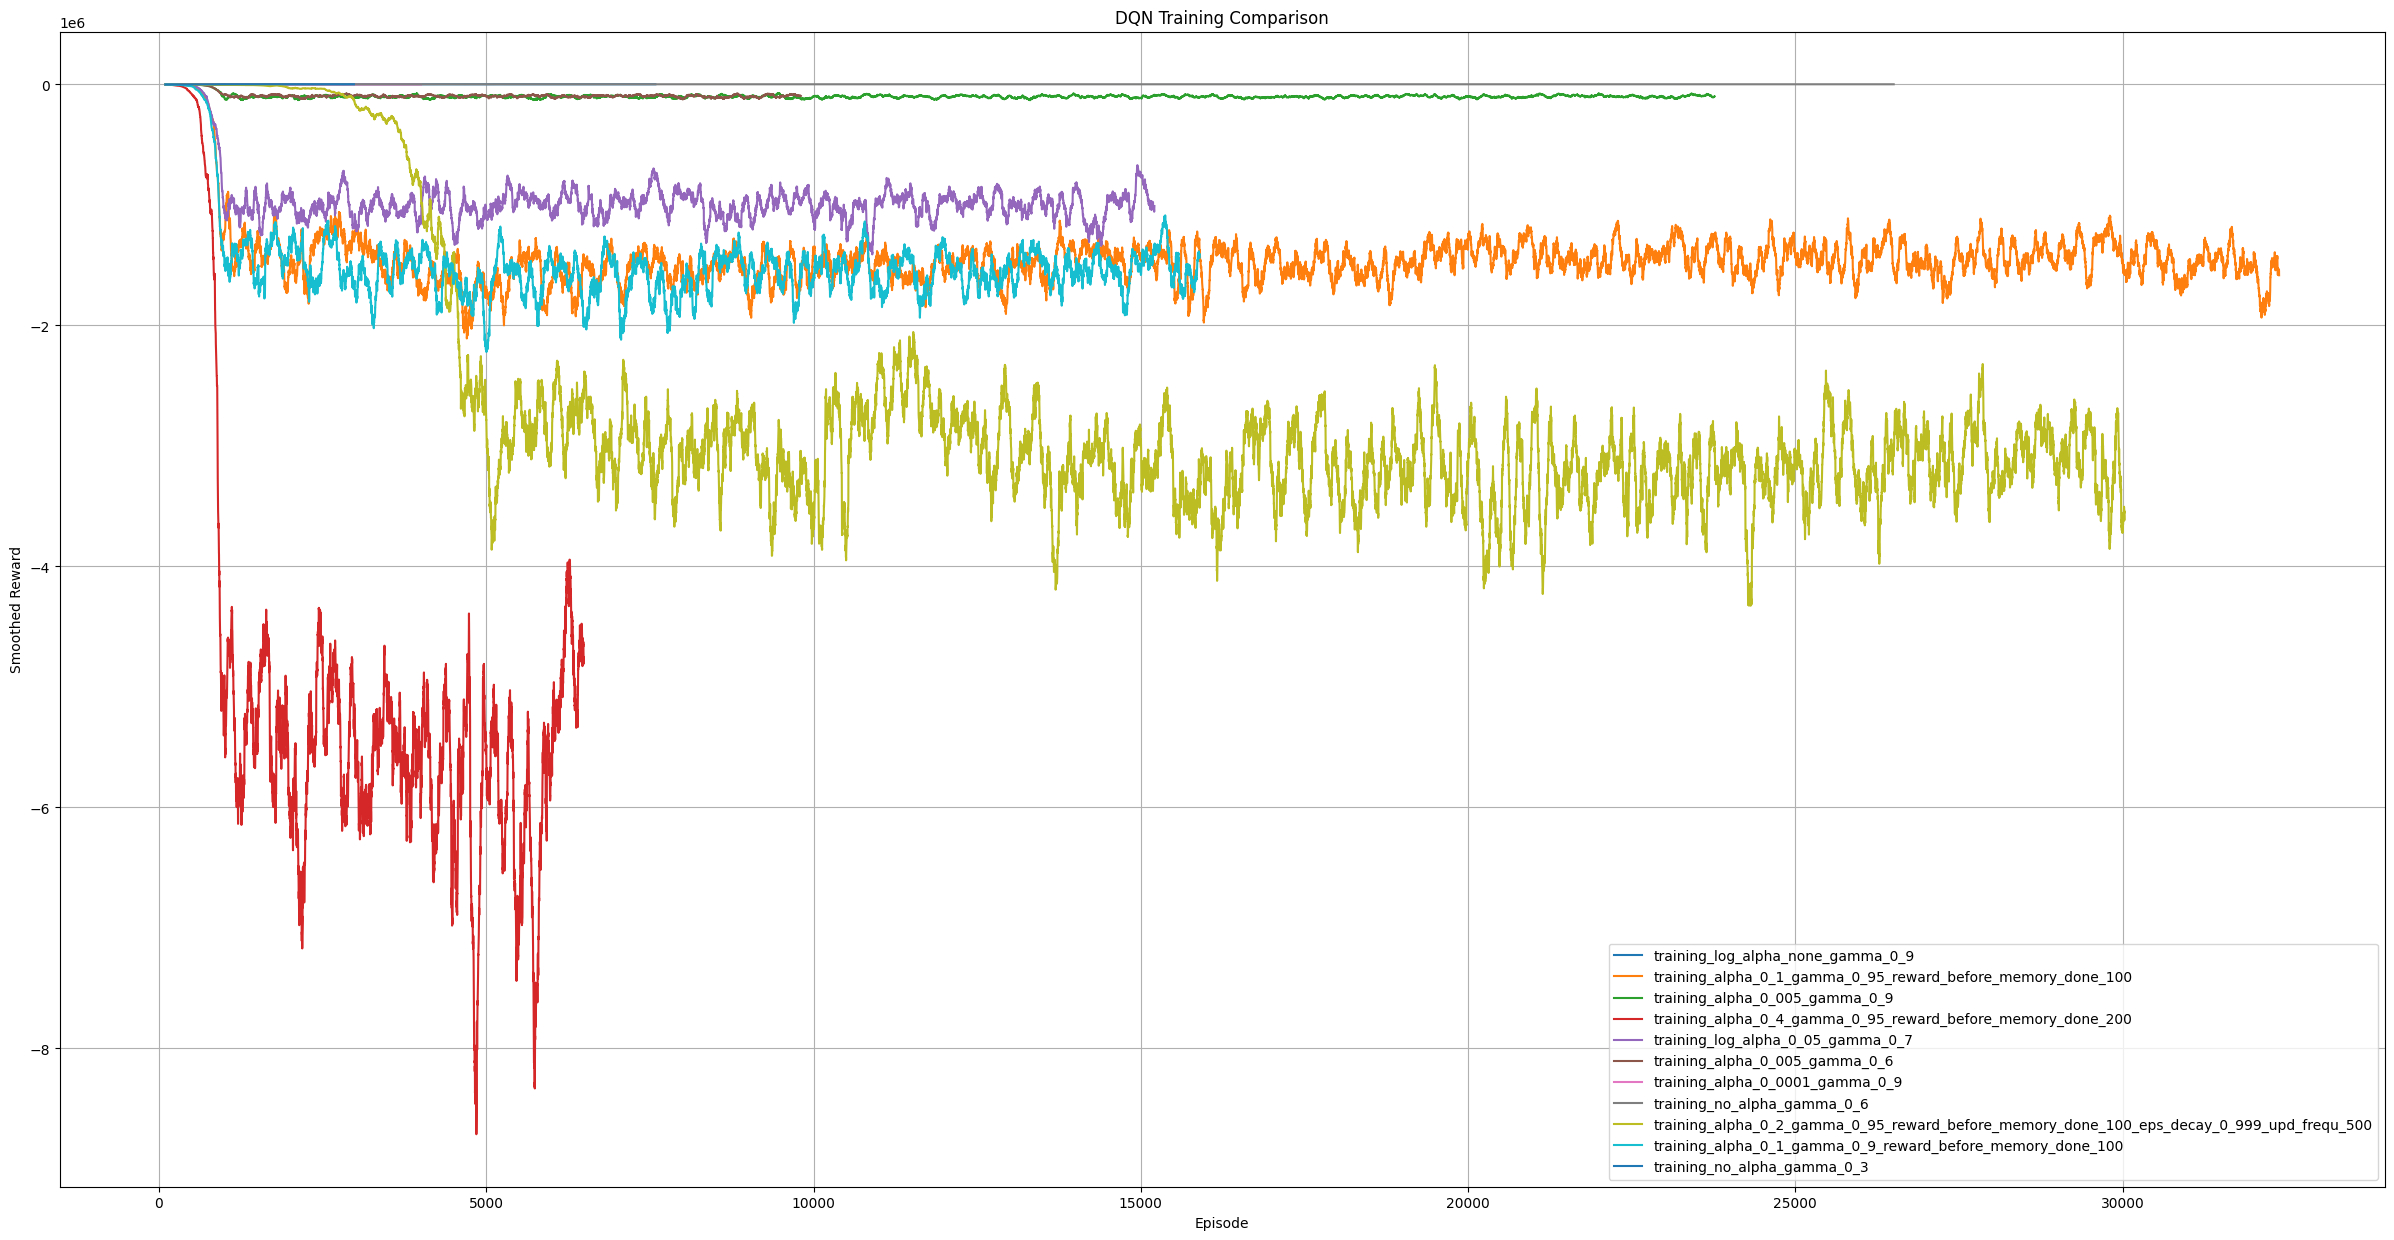

In [4]:
# Get all CSV files that match a pattern
csv_files = glob.glob("training_*.csv")  # Adjust the pattern as needed

# Plot settings
plt.figure(figsize=(30, 15))

# Loop through each file and plot its data
for file in csv_files:
    df = pd.read_csv(file)
    smoothed_rewards = smooth_data(df["Reward"], window_size=100)
    
    # Extract the file name without extension for labeling
    label = file.split('/')[-1].replace('.csv', '')  # Adjust if files are in subdirectories
    plt.plot(smoothed_rewards, label=label)
    
# Customize the plot
plt.xlabel('Episode')
plt.ylabel('Smoothed Reward')
plt.title('DQN Training Comparison')
plt.legend()  # Show labels for different runs
plt.grid(True)
plt.show()

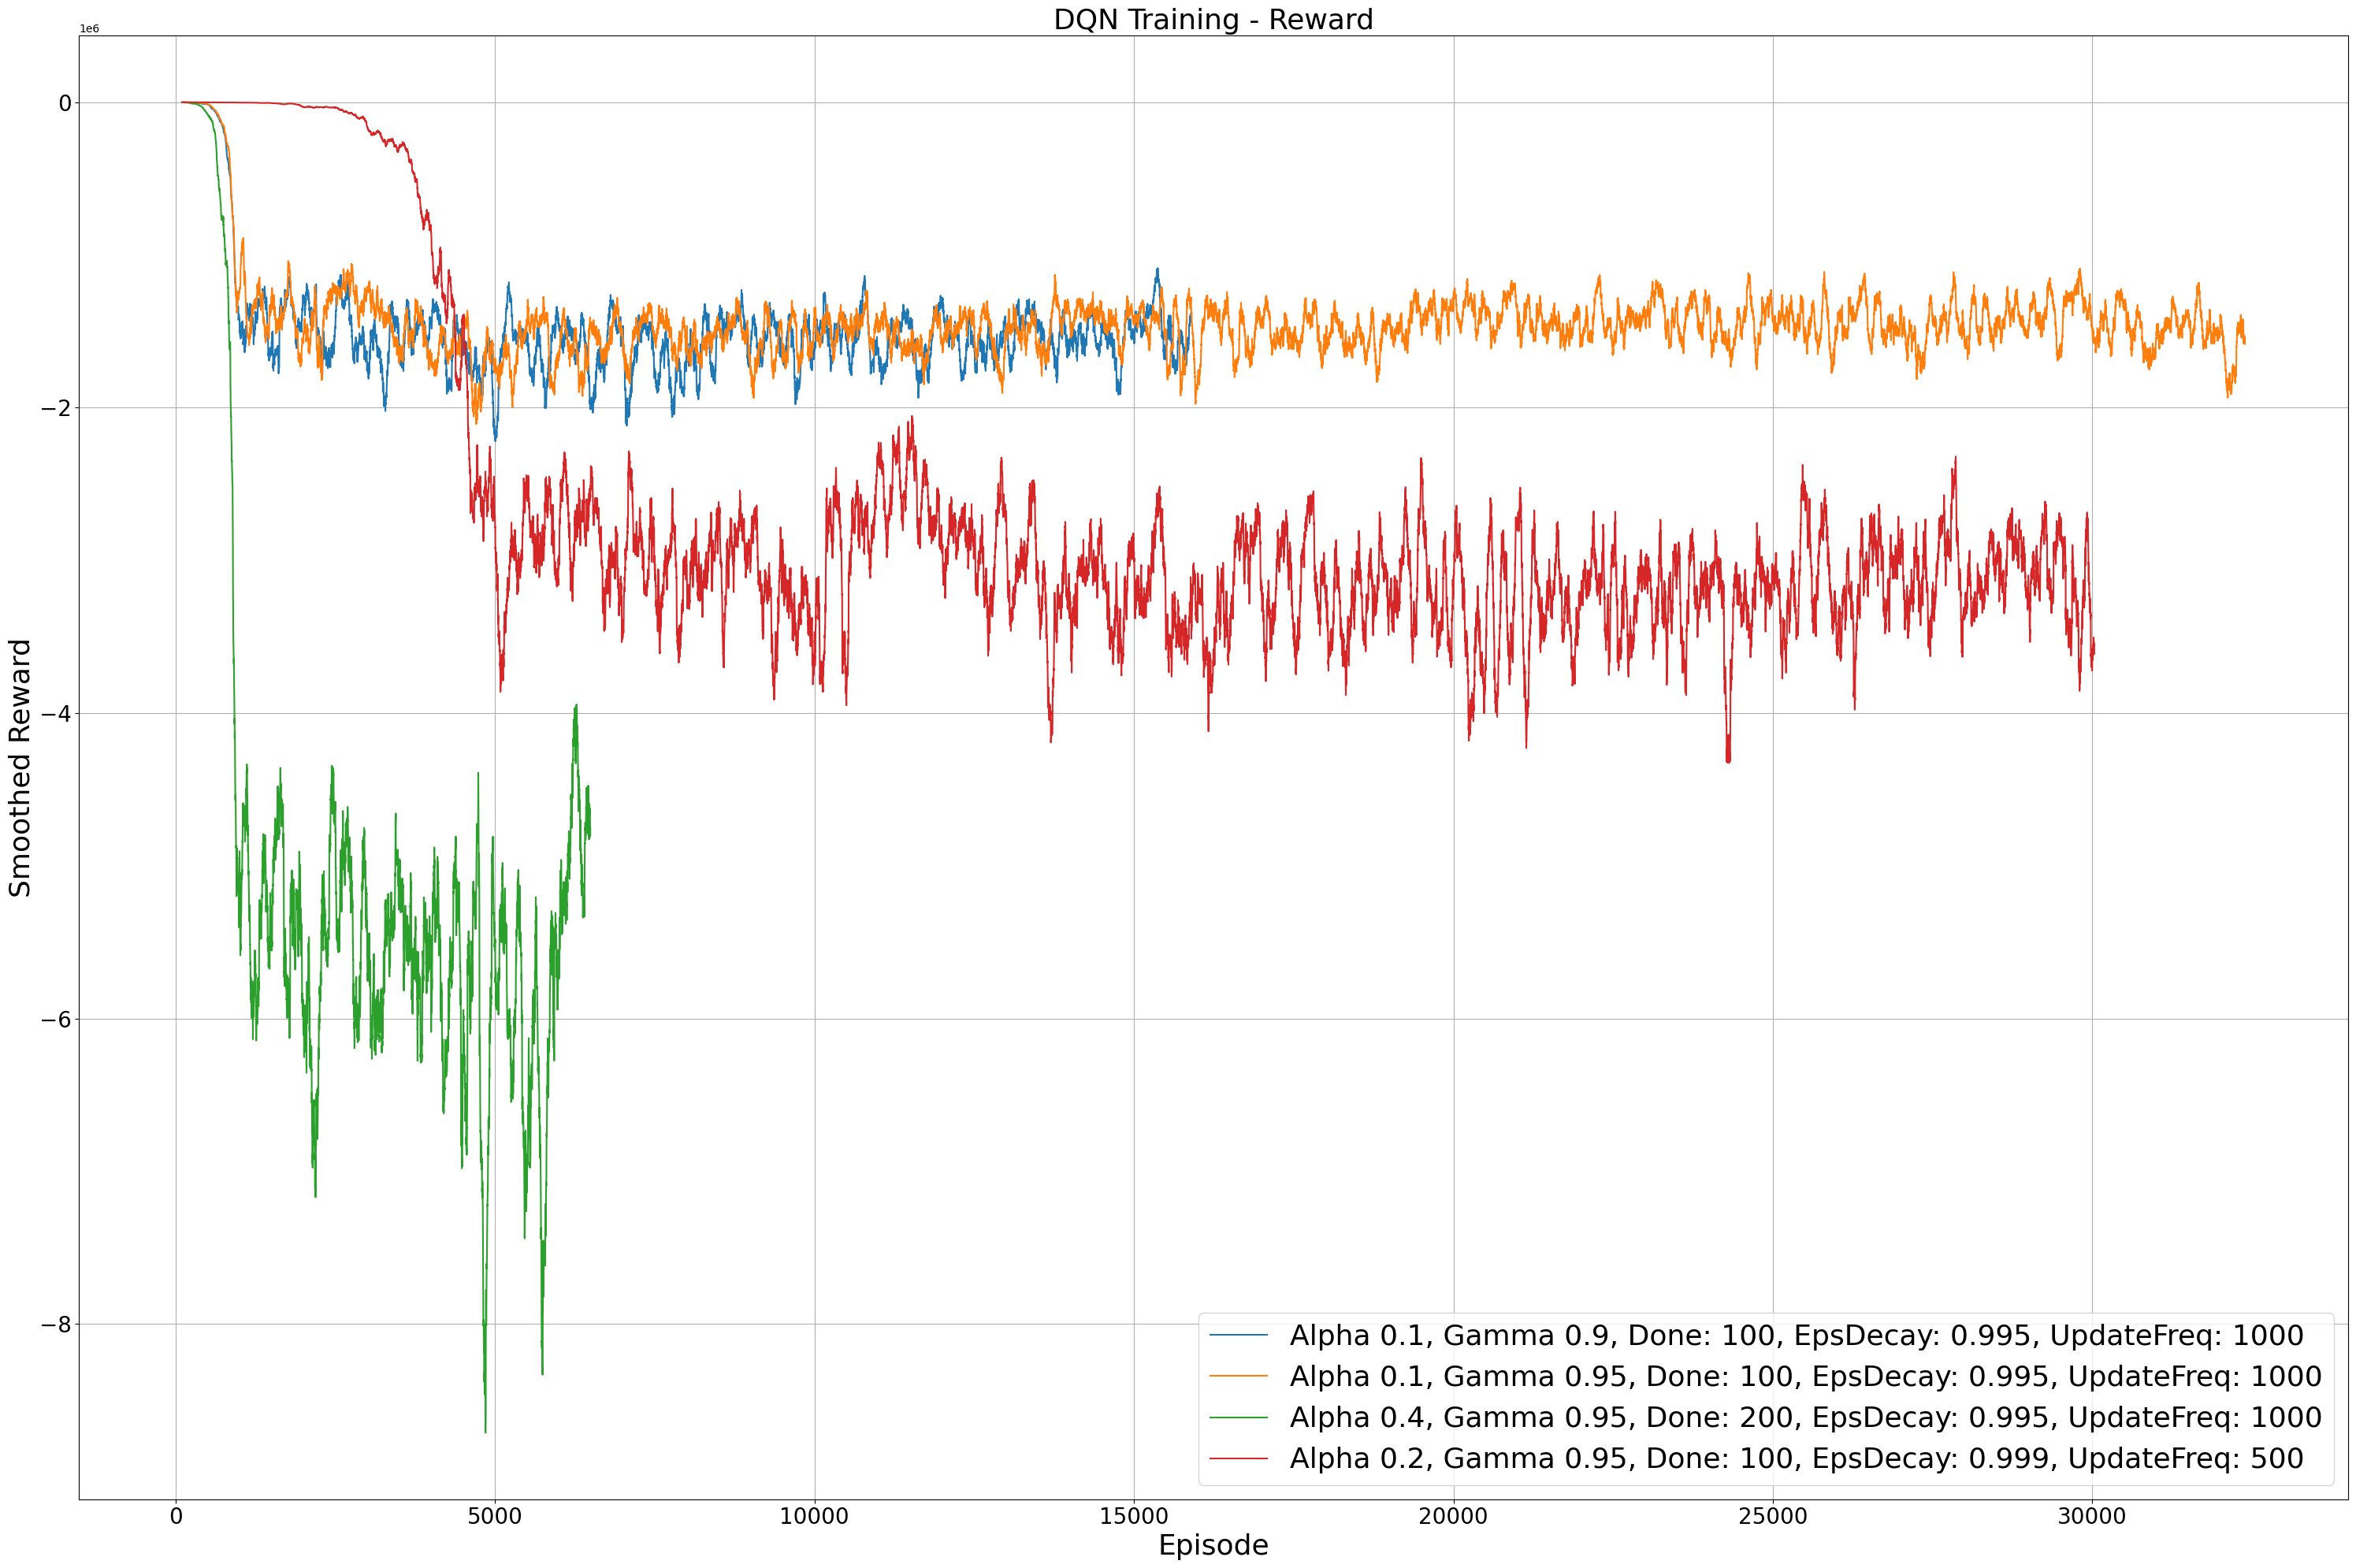

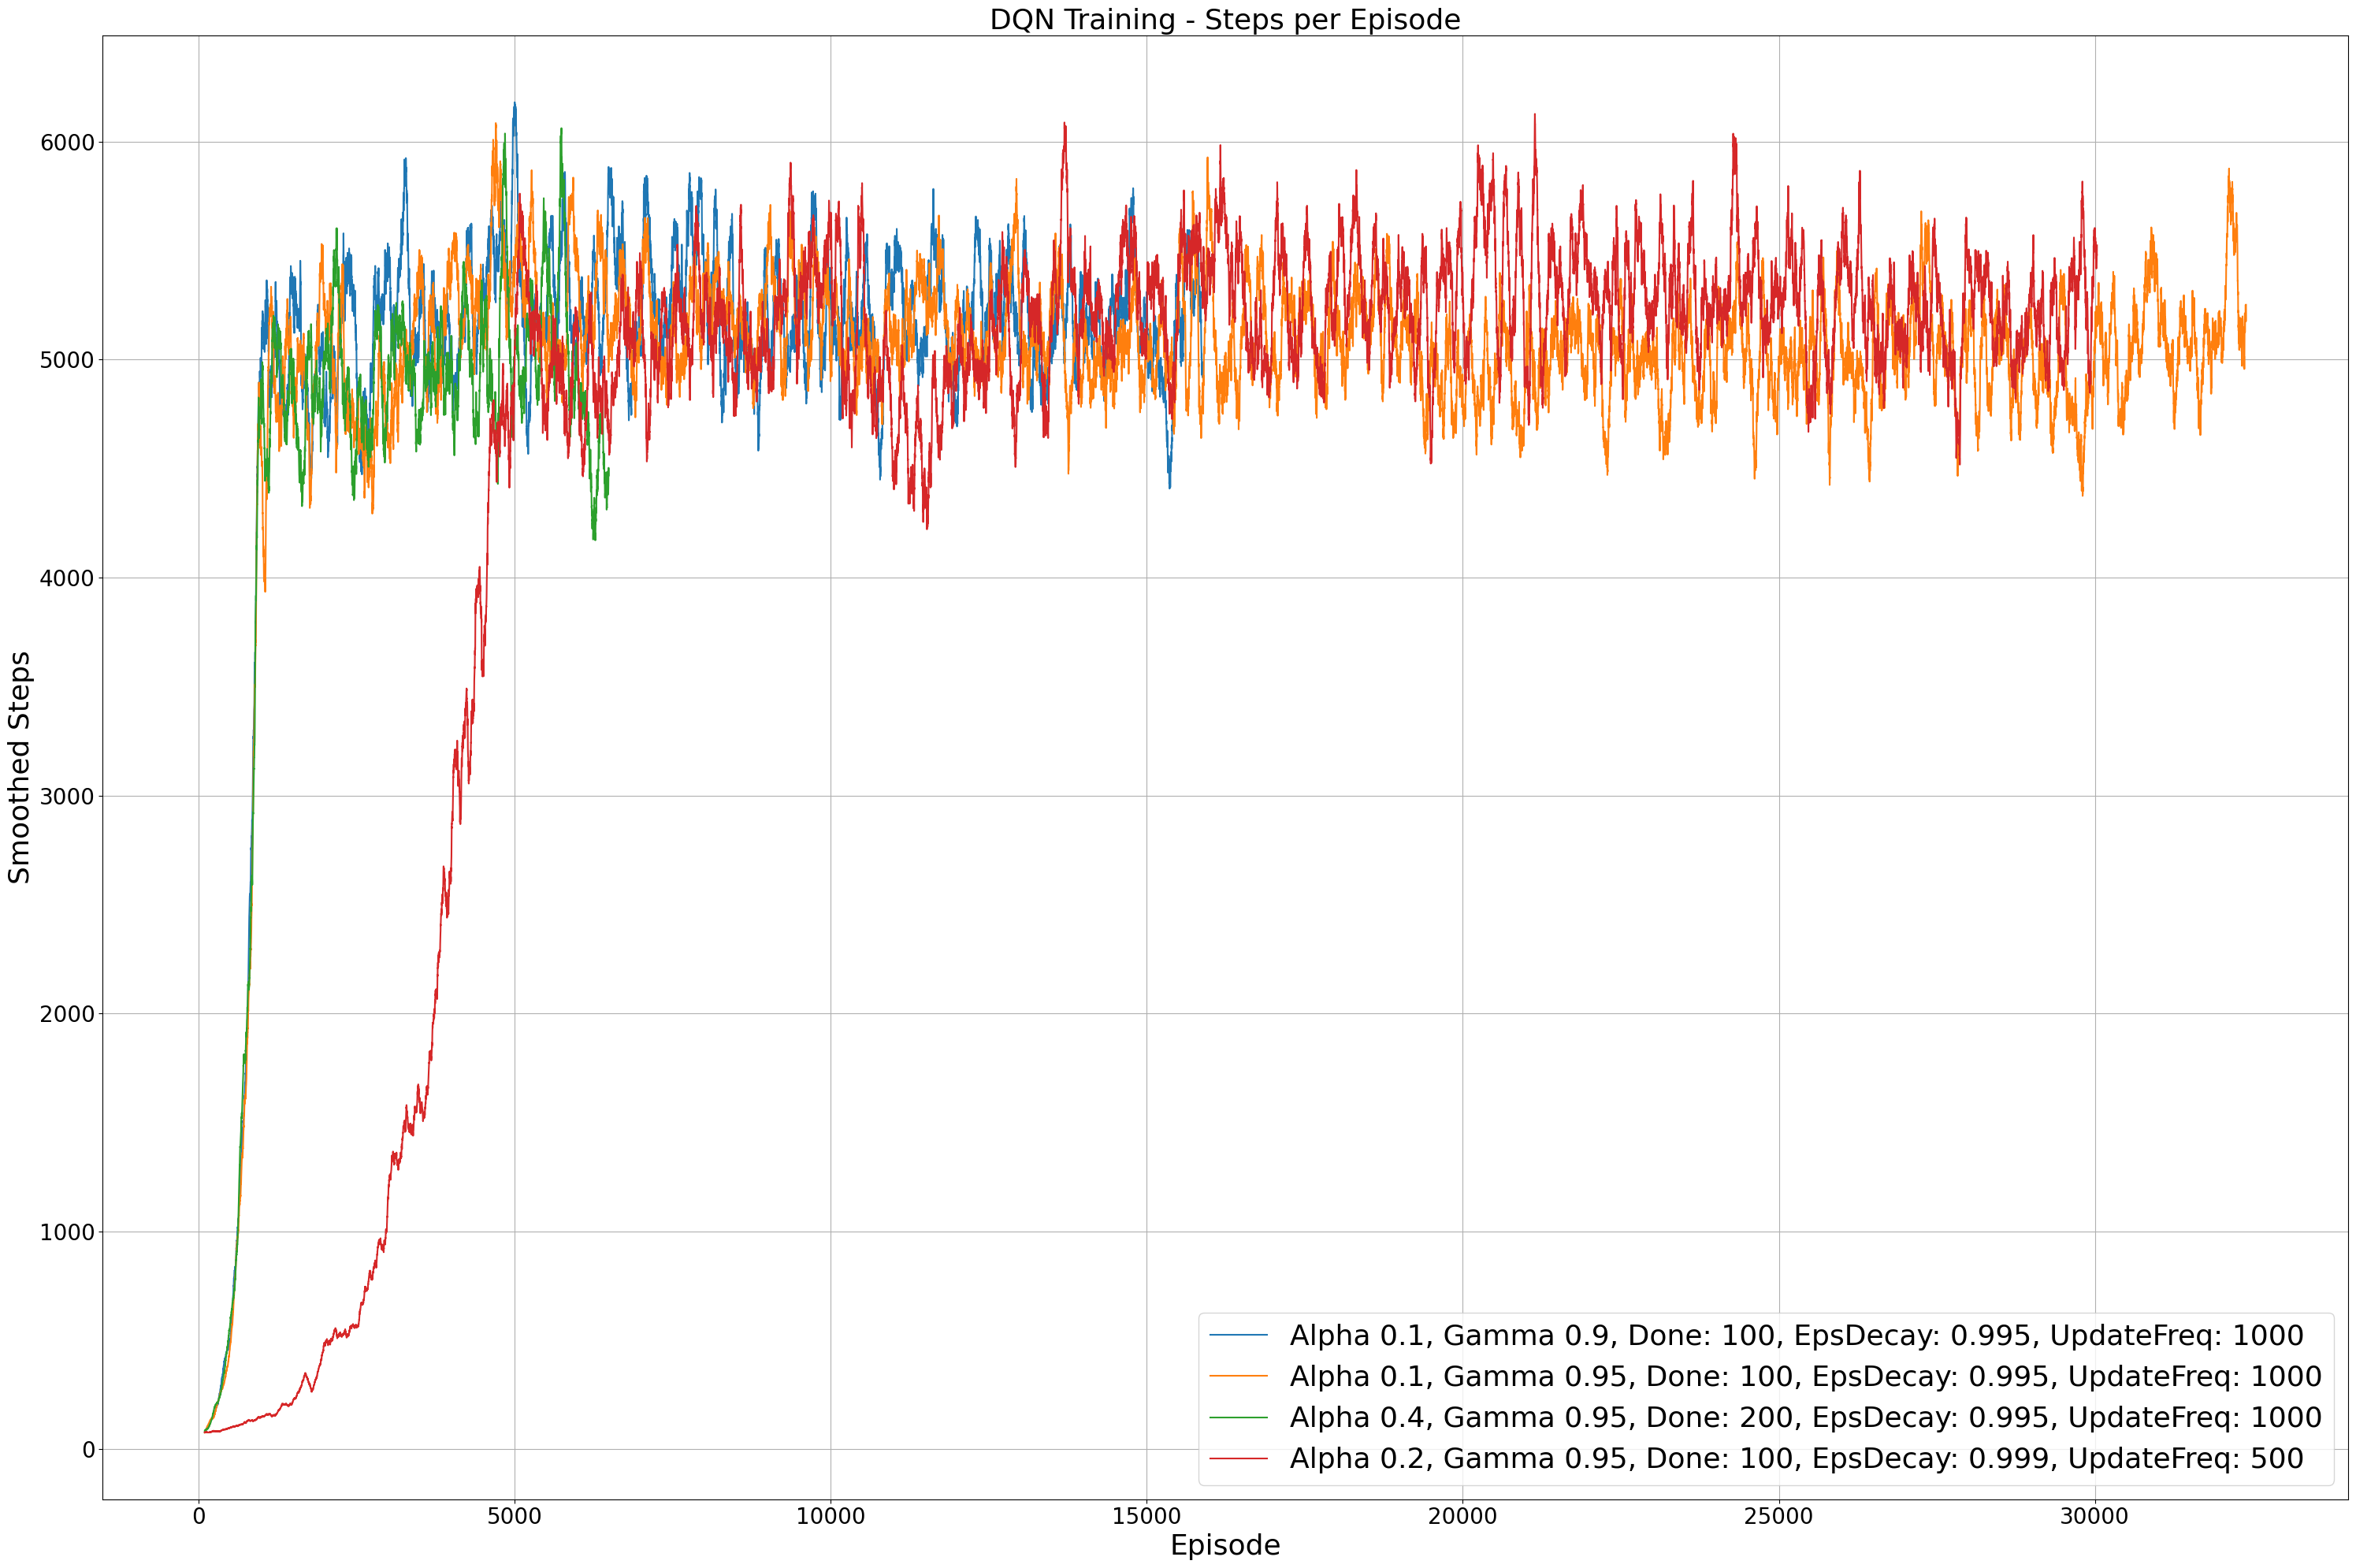

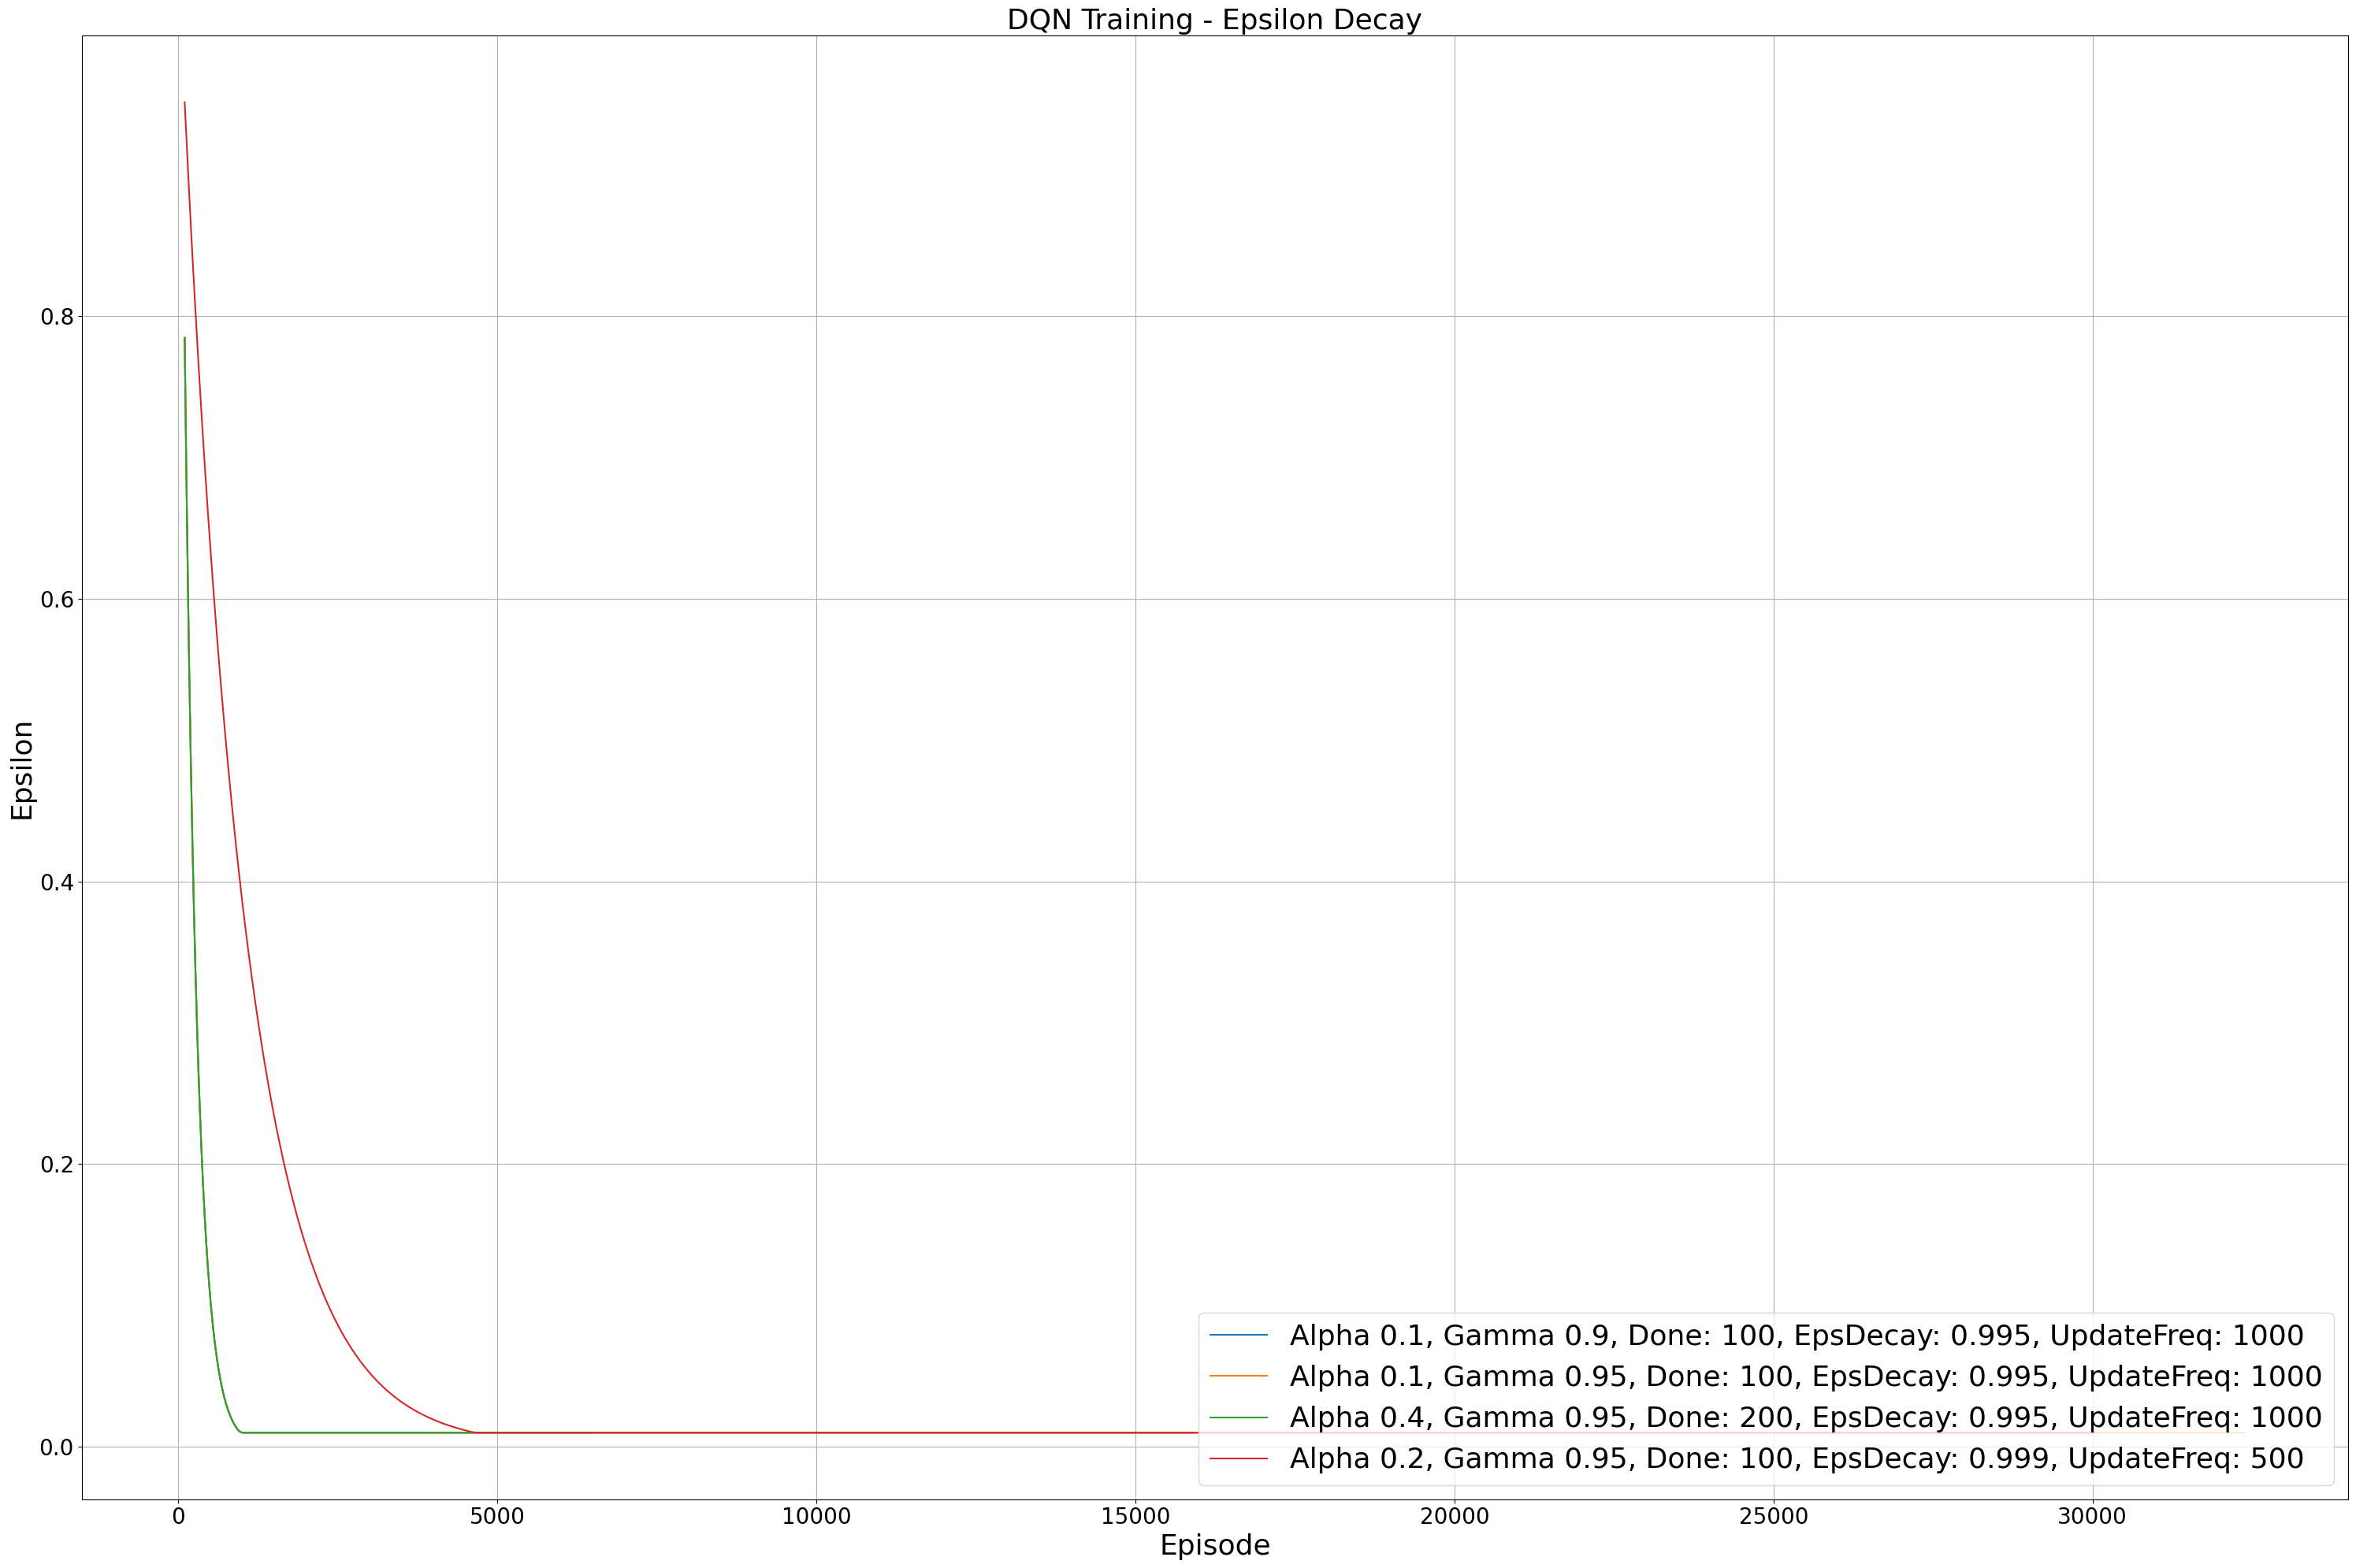

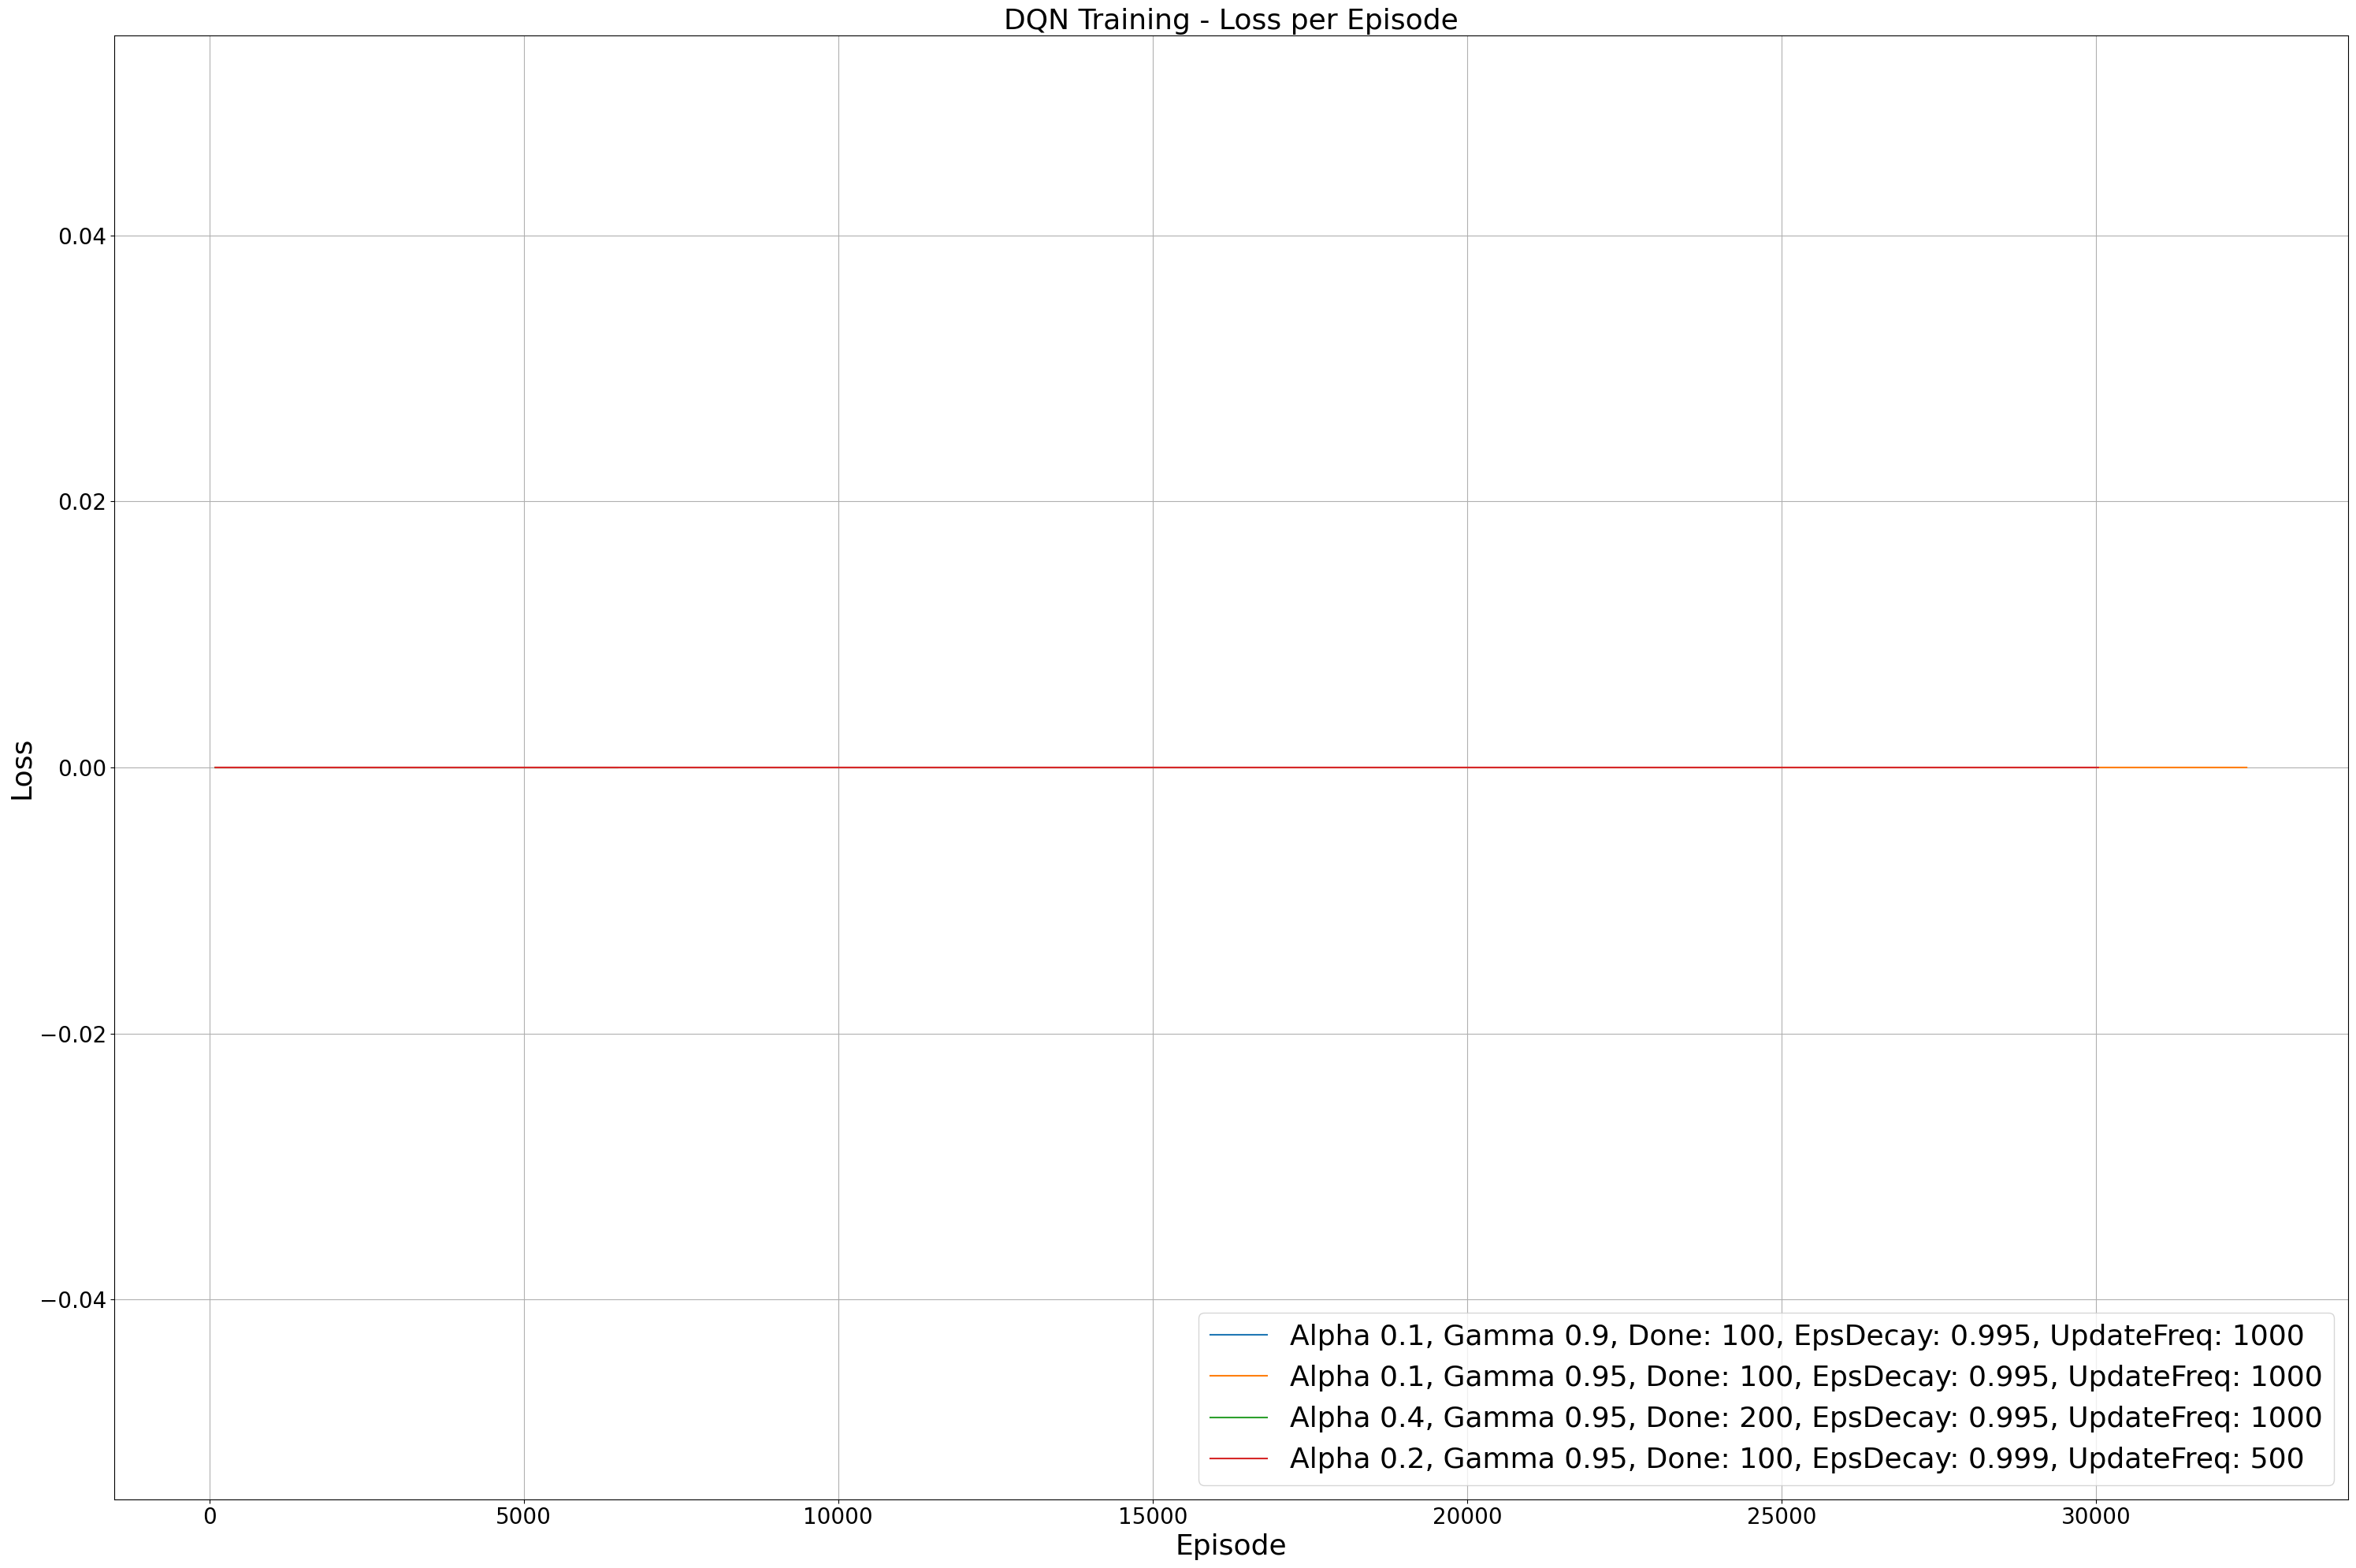

In [23]:
# Define files to include and their custom labels
file_labels = {
    "training_alpha_0_1_gamma_0_9_reward_before_memory_done_100.csv": "Alpha 0.1, Gamma 0.9, Done: 100, EpsDecay: 0.995, UpdateFreq: 1000",
    "training_alpha_0_1_gamma_0_95_reward_before_memory_done_100.csv": "Alpha 0.1, Gamma 0.95, Done: 100, EpsDecay: 0.995, UpdateFreq: 1000",
    "training_alpha_0_4_gamma_0_95_reward_before_memory_done_200.csv": "Alpha 0.4, Gamma 0.95, Done: 200, EpsDecay: 0.995, UpdateFreq: 1000",
    "training_alpha_0_2_gamma_0_95_reward_before_memory_done_100_eps_decay_0_999_upd_frequ_500.csv": "Alpha 0.2, Gamma 0.95, Done: 100, EpsDecay: 0.999, UpdateFreq: 500",
}

# Plot function for each metric
def plot_metric(metric_name, y_label, title, window=100):
    plt.figure(figsize=(30, 20))
    for file, label in file_labels.items():
        try:
            df = pd.read_csv(file)
            smoothed = df[metric_name].rolling(window=window).mean()
            plt.plot(smoothed, label=label)
        except FileNotFoundError:
            print(f"Warning: {file} not found, skipping.")
    plt.xlabel("Episode", fontsize=26)
    plt.ylabel(y_label, fontsize=26)
    plt.title(title, fontsize=26)
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=26)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

# Plot each metric in its own figure
plot_metric("Reward", "Smoothed Reward", "DQN Training - Reward")
plot_metric("Steps", "Smoothed Steps", "DQN Training - Steps per Episode")
plot_metric("Epsilon", "Epsilon", "DQN Training - Epsilon Decay")
plot_metric("Loss", "Loss", "DQN Training - Loss per Episode")

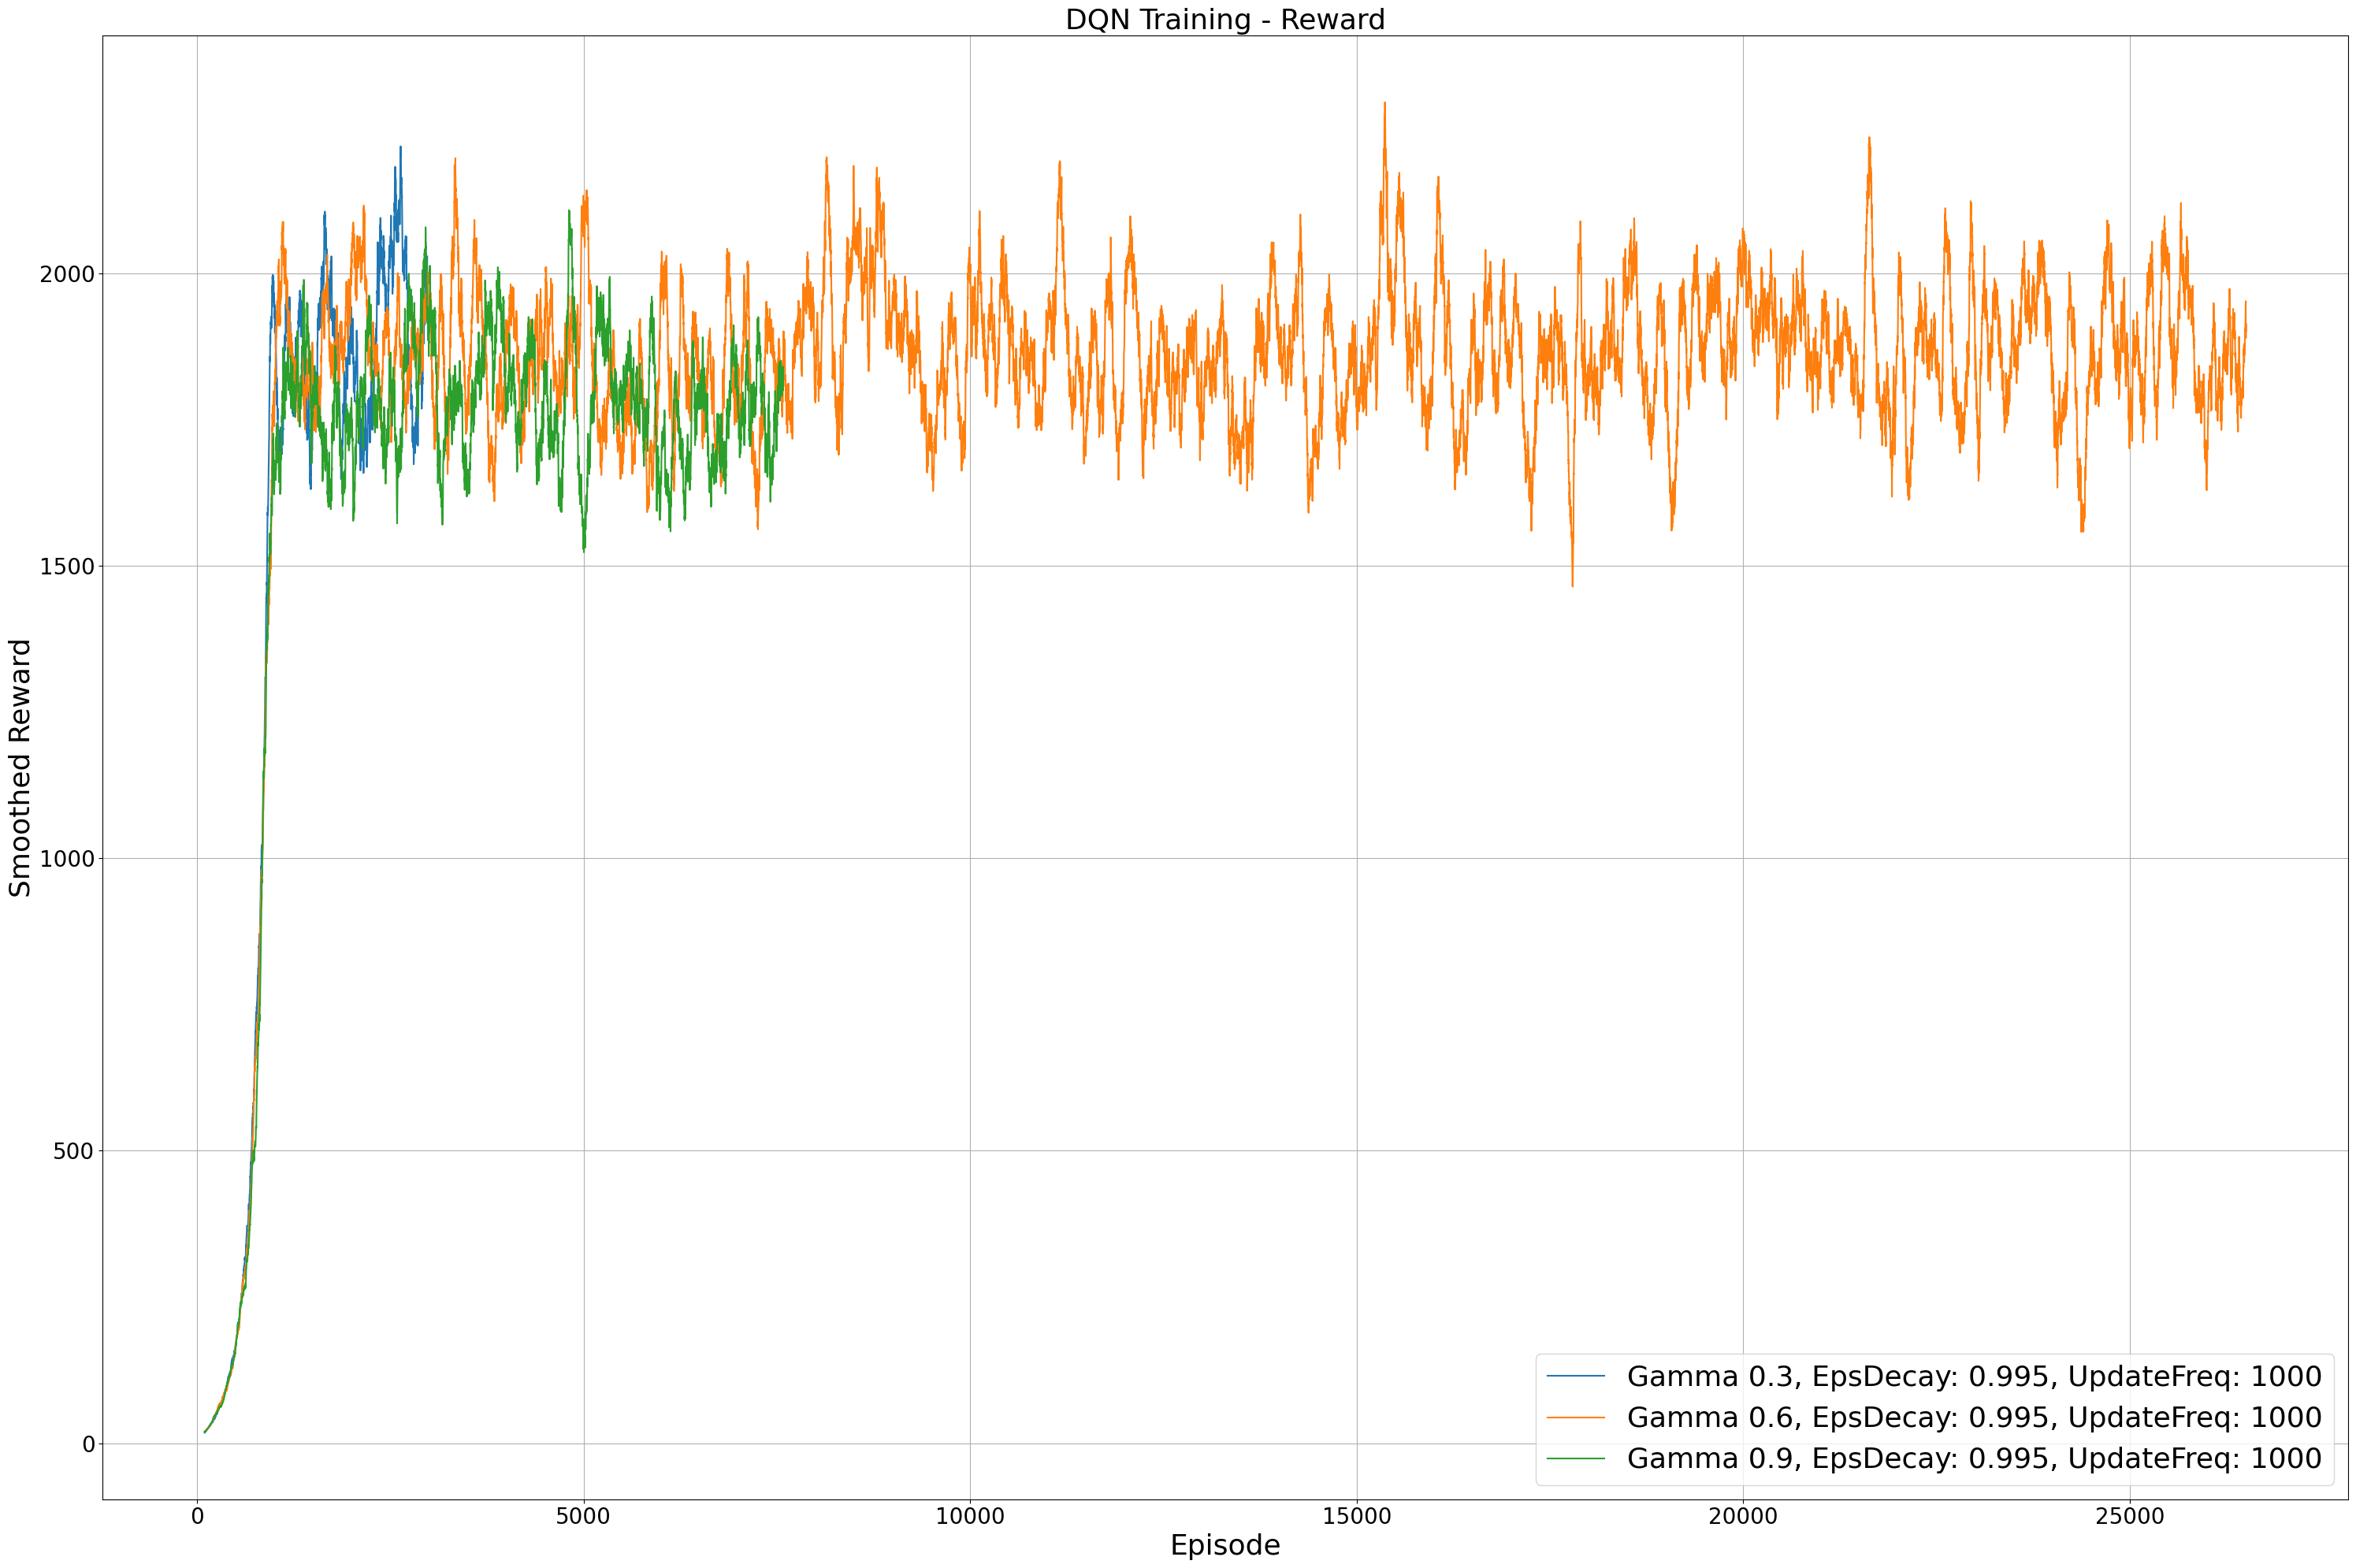

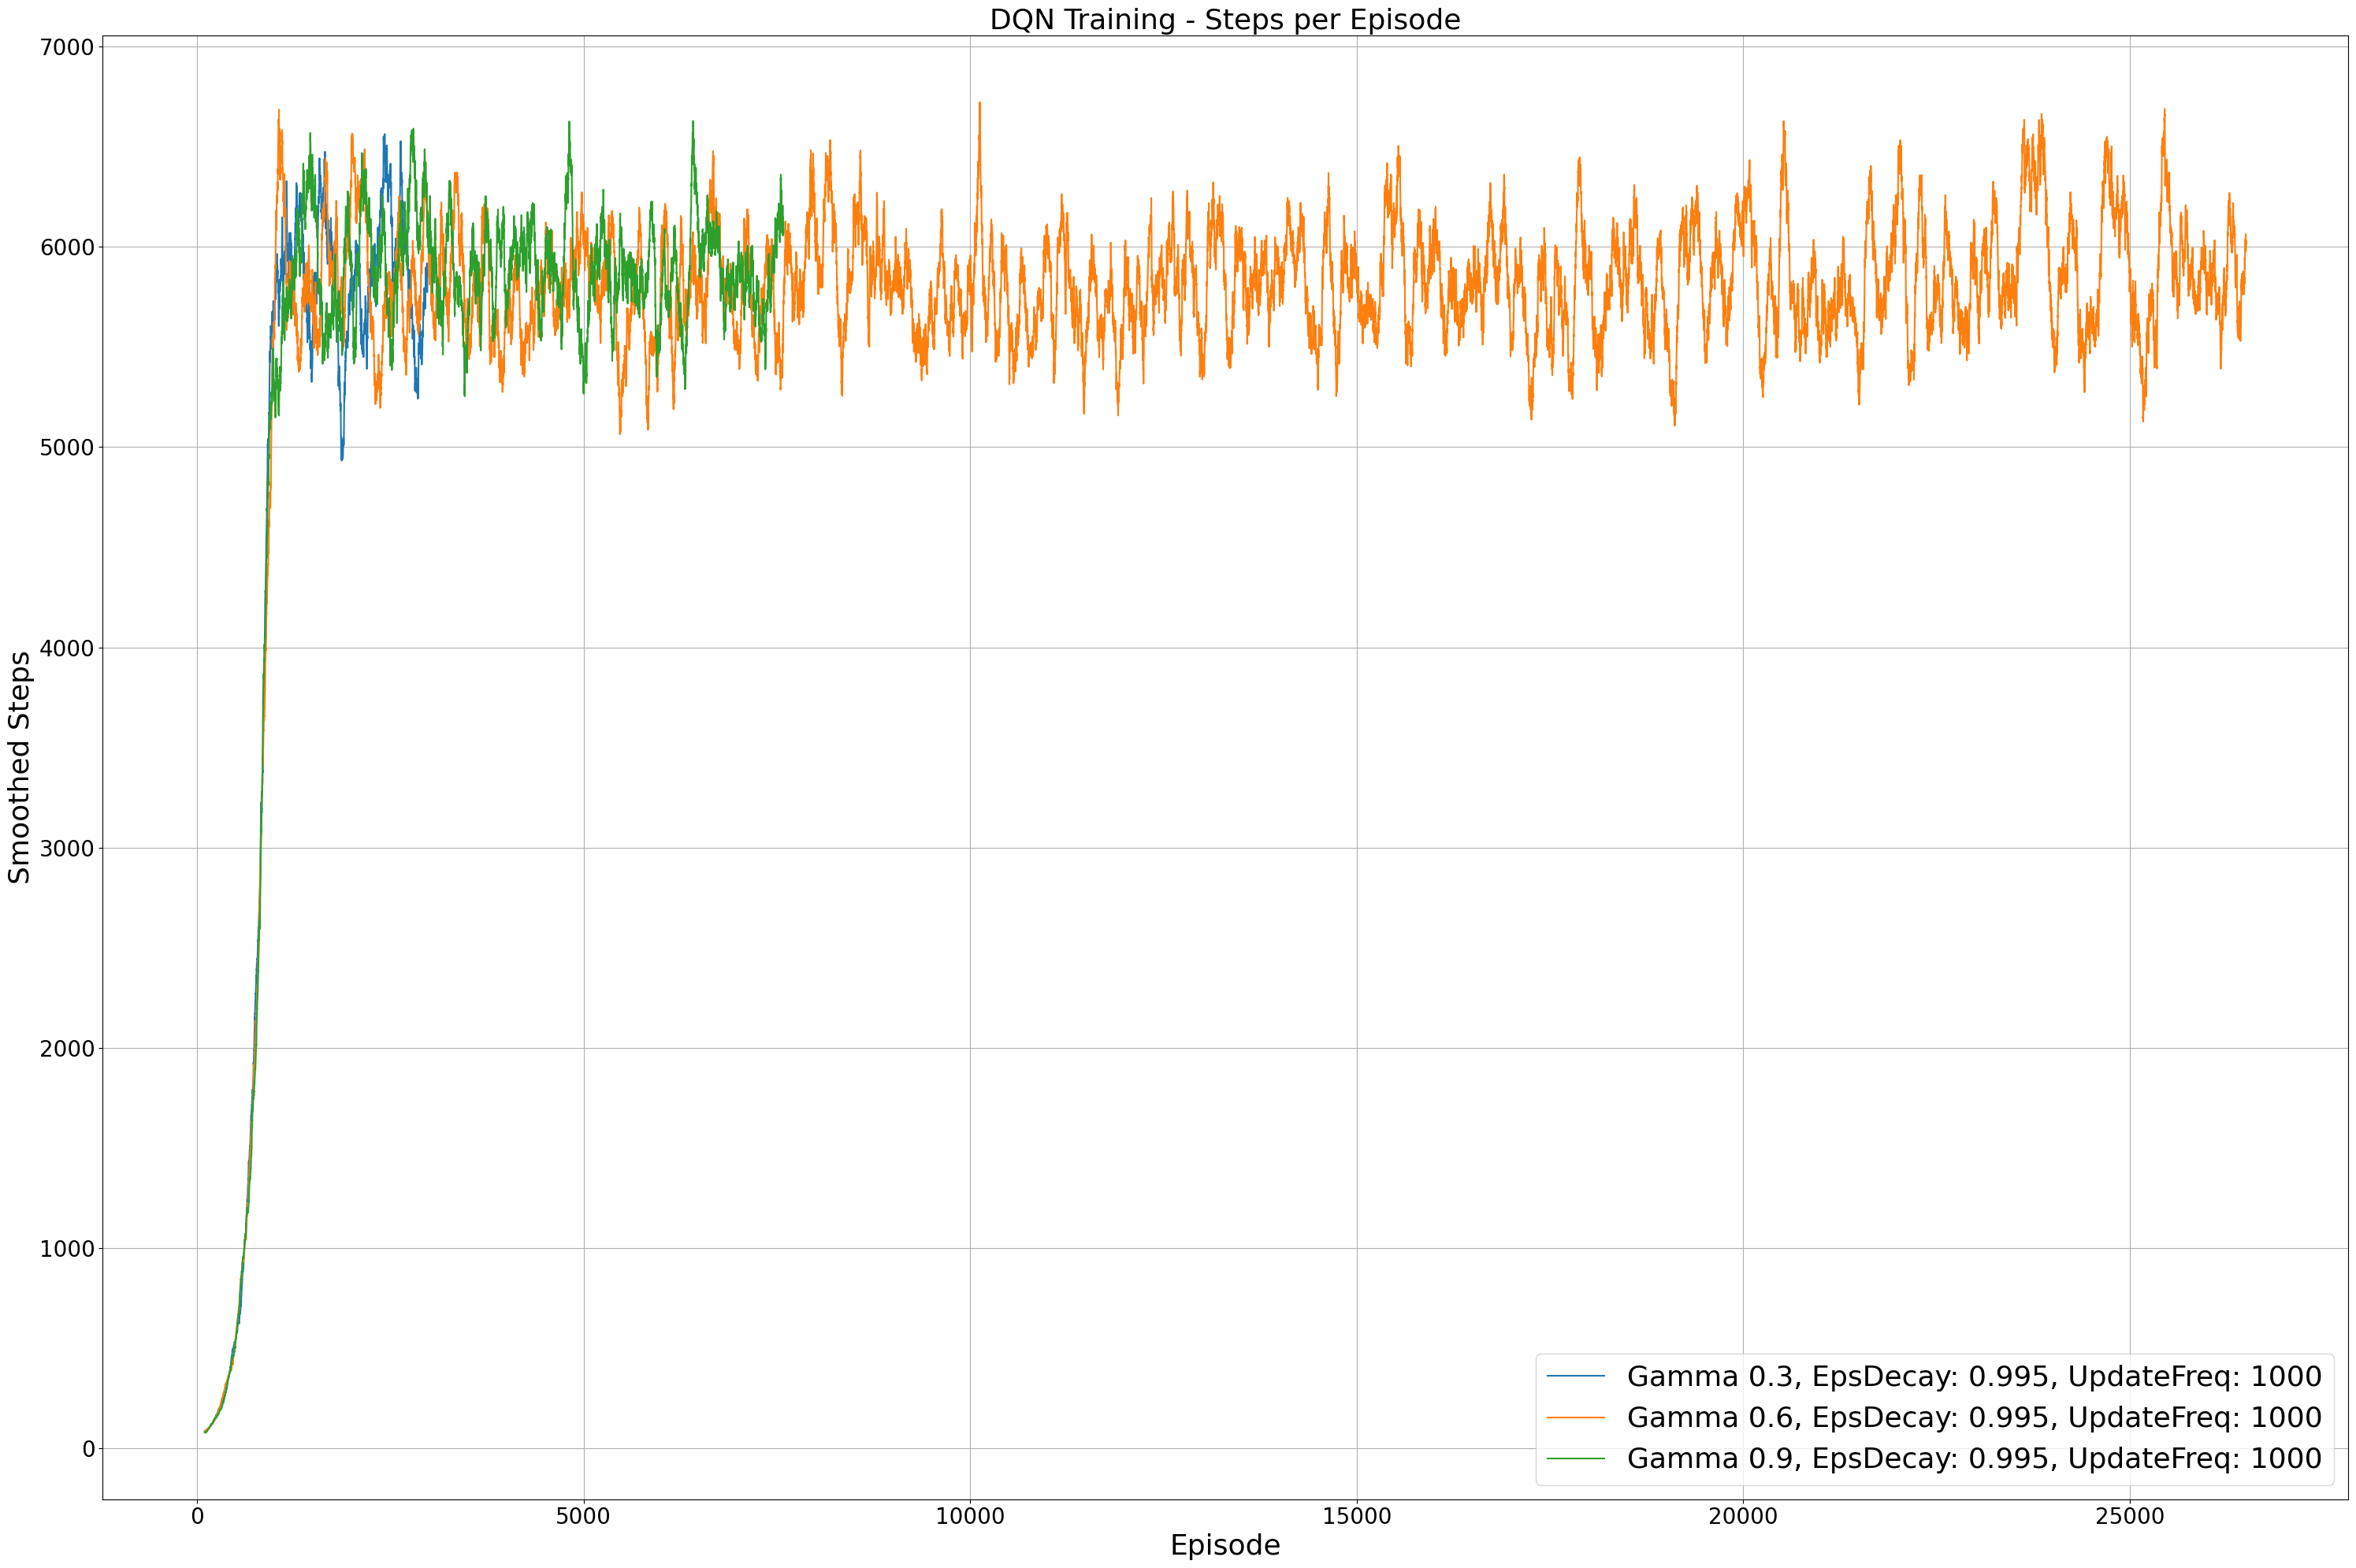

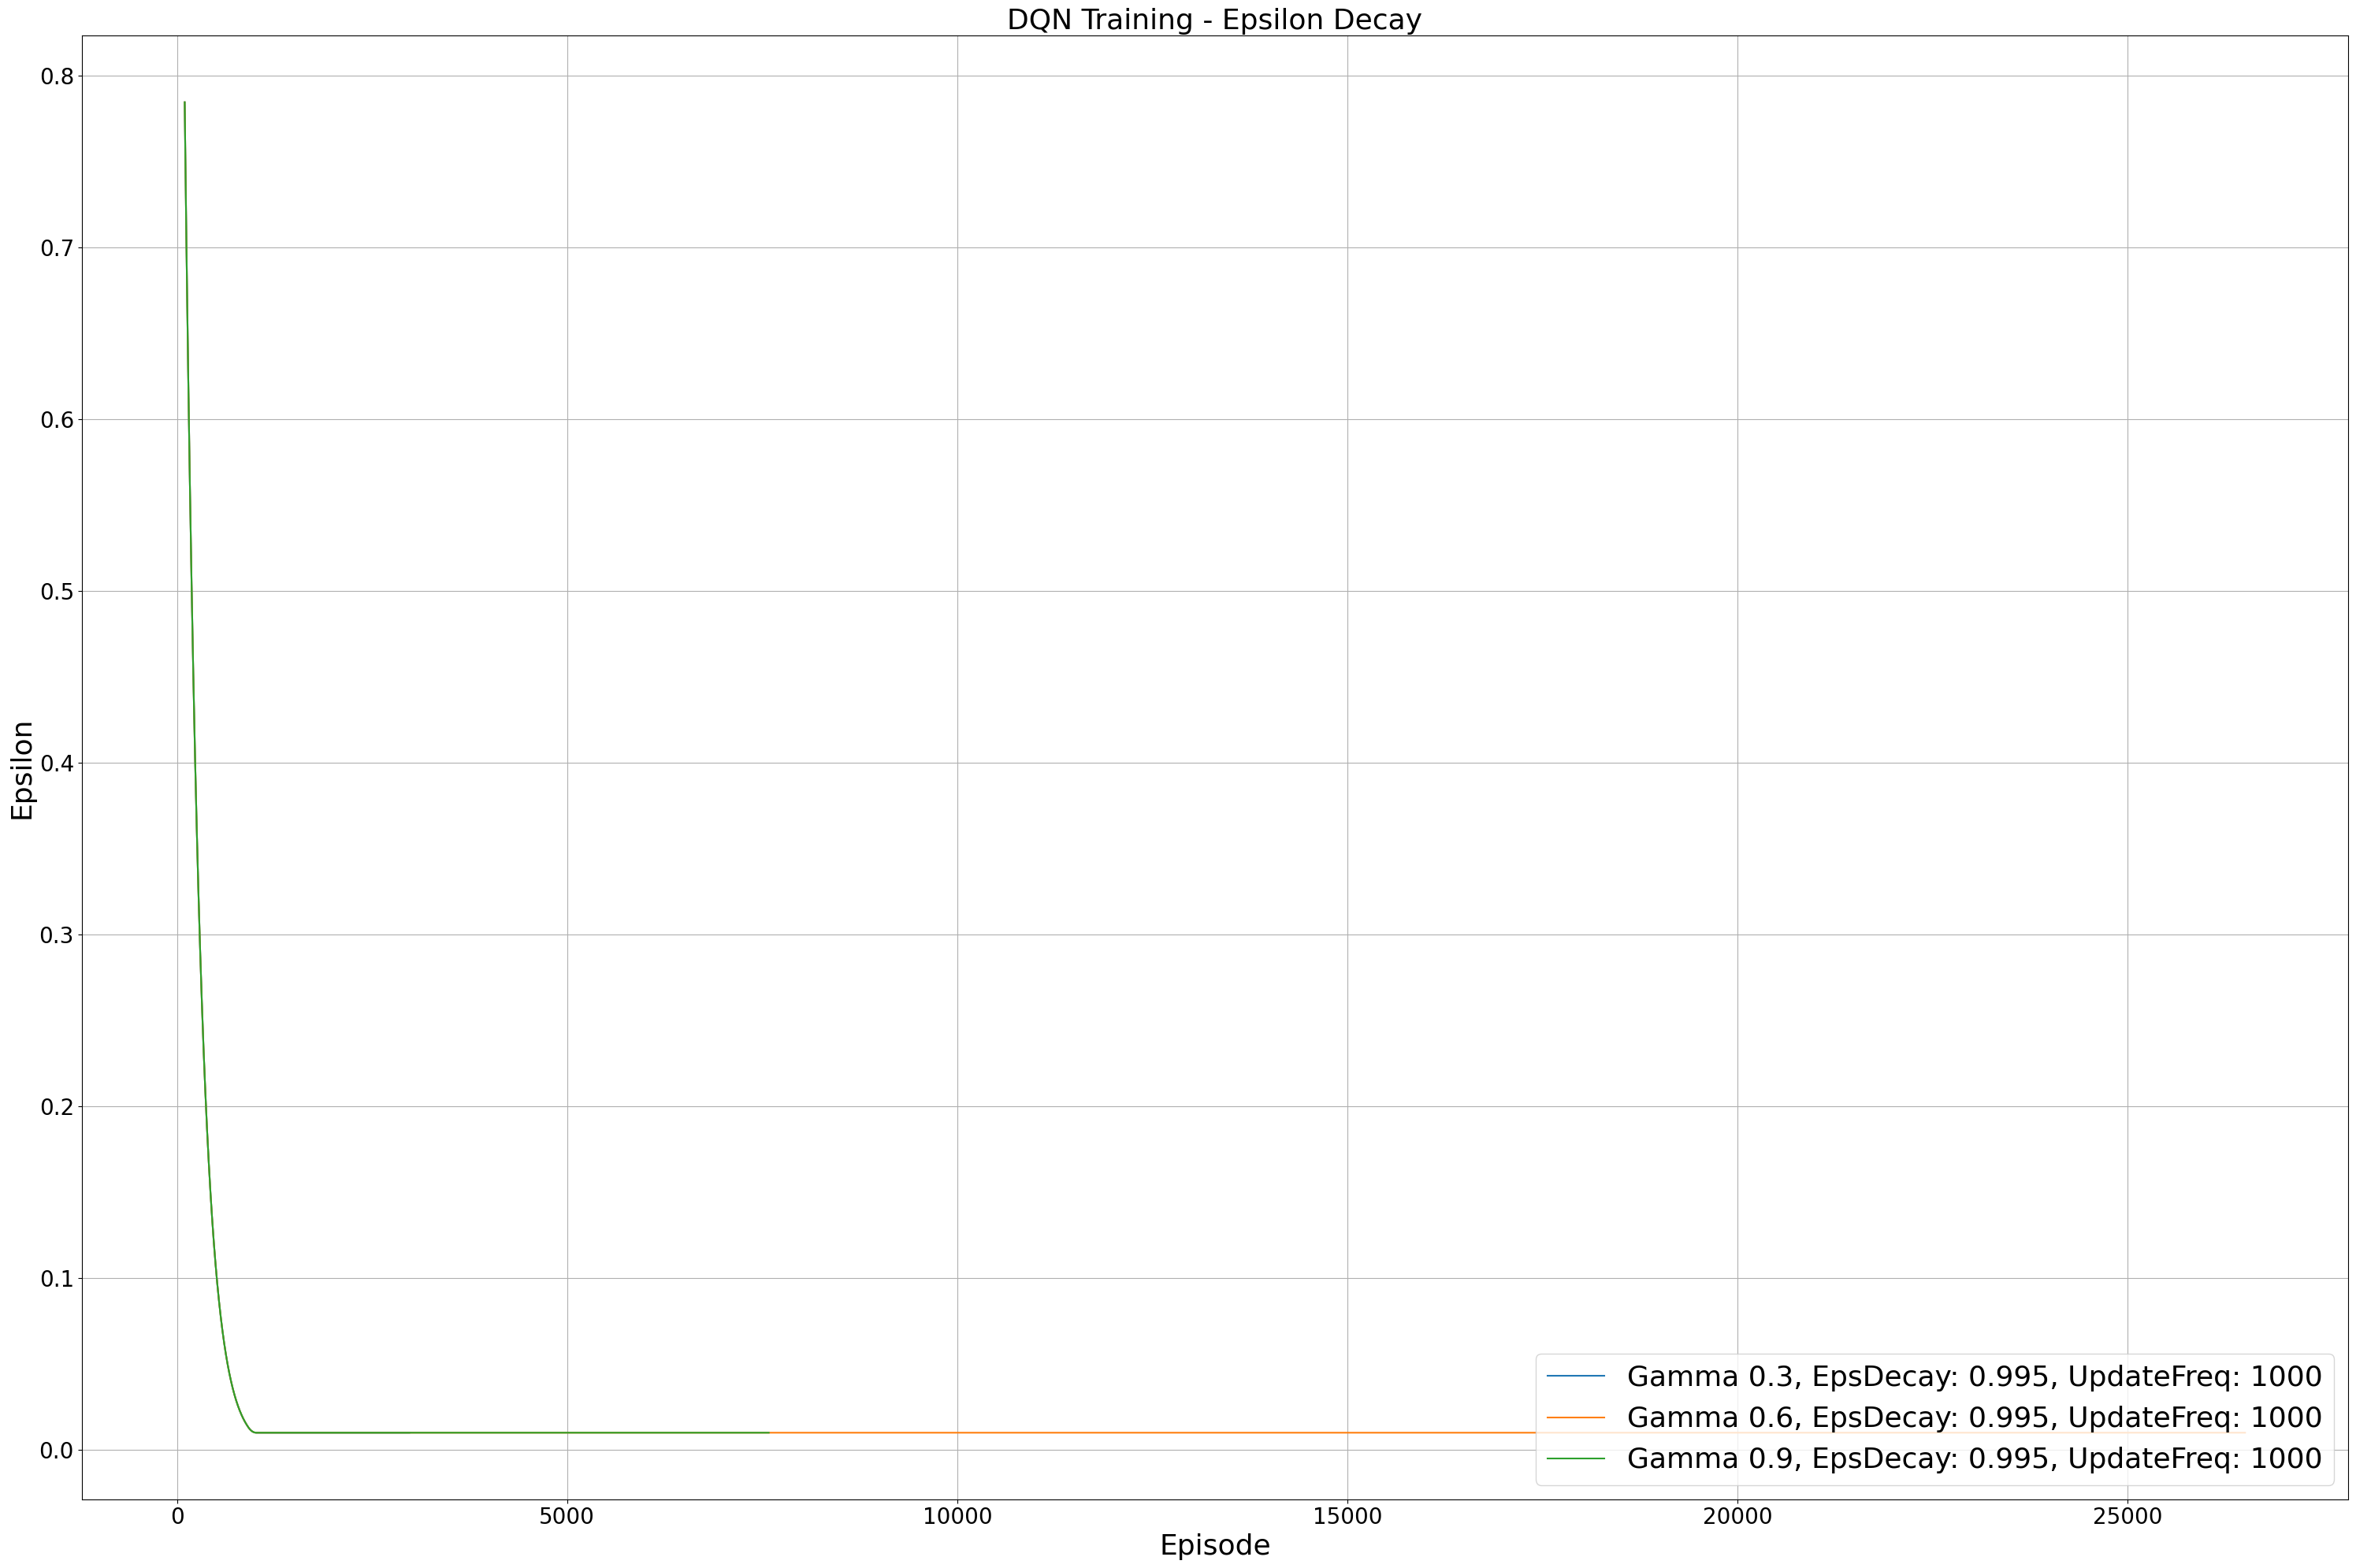

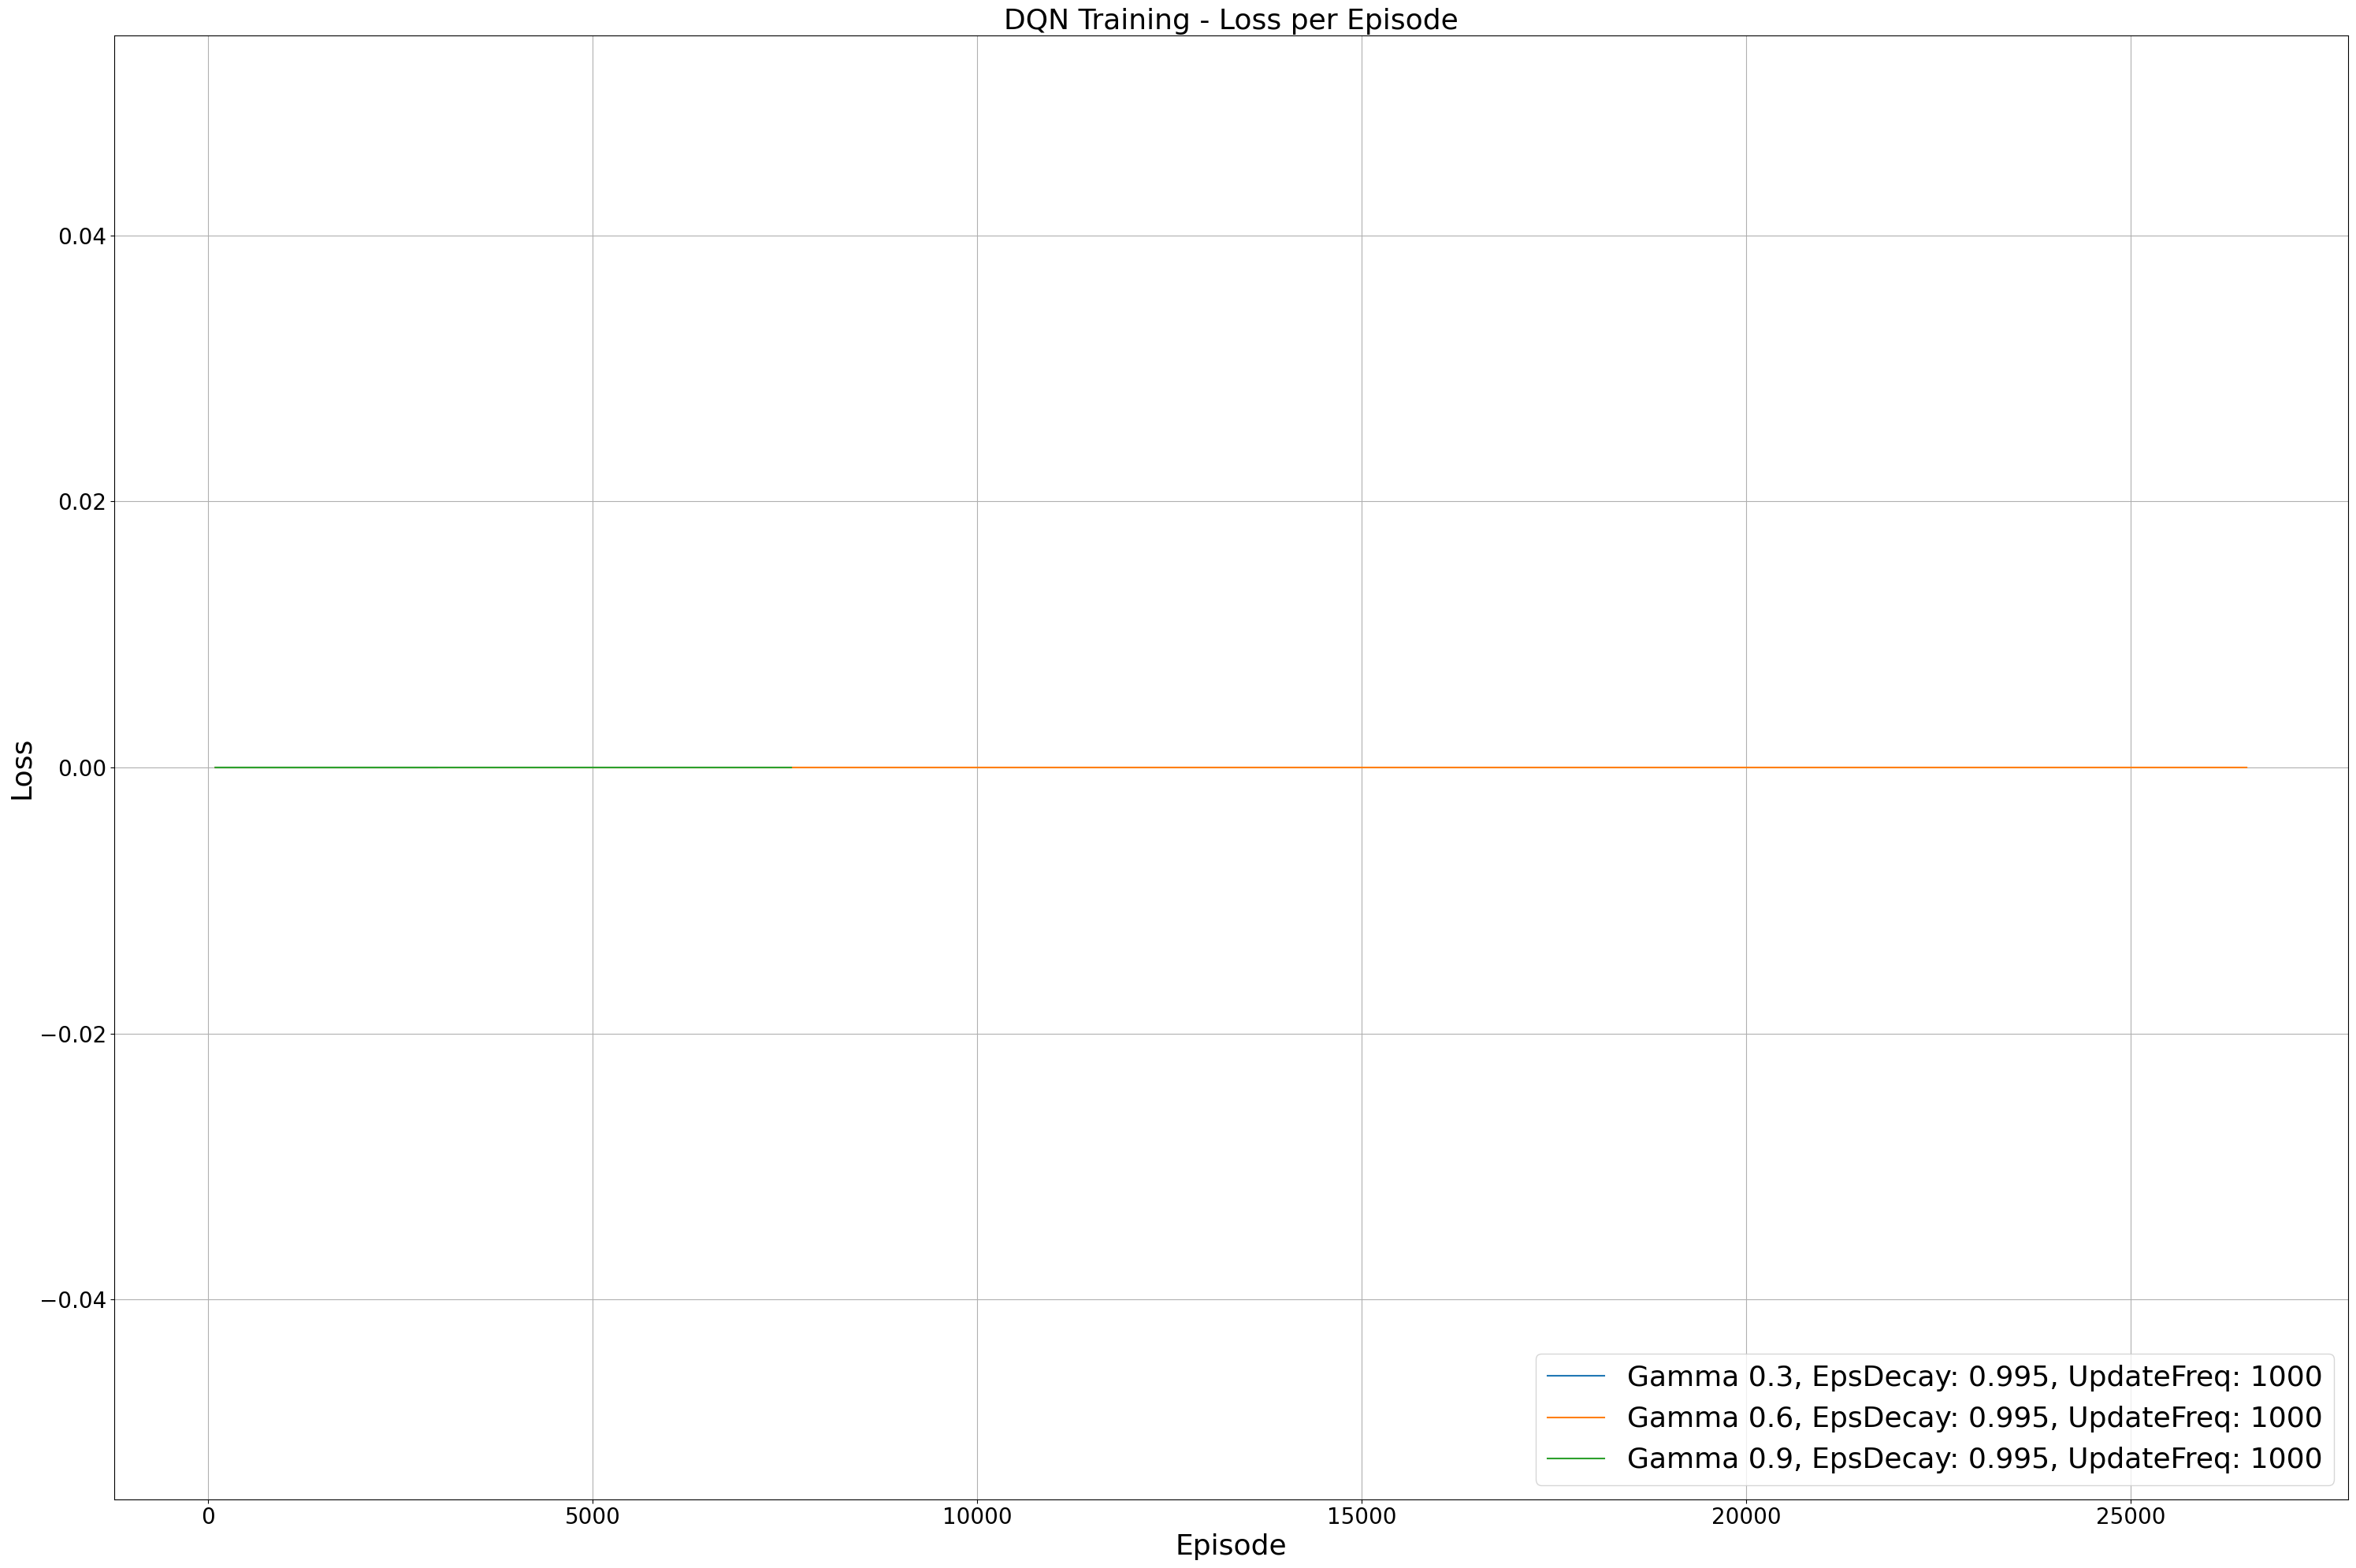

In [25]:
# Define files to include and their custom labels
file_labels = {
    "training_no_alpha_gamma_0_3.csv": "Gamma 0.3, EpsDecay: 0.995, UpdateFreq: 1000",
    "training_no_alpha_gamma_0_6.csv": "Gamma 0.6, EpsDecay: 0.995, UpdateFreq: 1000",
    "training_log_alpha_none_gamma_0_9.csv": "Gamma 0.9, EpsDecay: 0.995, UpdateFreq: 1000",
}

# Plot function for each metric
def plot_metric(metric_name, y_label, title, window=100):
    plt.figure(figsize=(30, 20))
    for file, label in file_labels.items():
        try:
            df = pd.read_csv(file)
            smoothed = df[metric_name].rolling(window=window).mean()
            plt.plot(smoothed, label=label)
        except FileNotFoundError:
            print(f"Warning: {file} not found, skipping.")
    plt.xlabel("Episode", fontsize=26)
    plt.ylabel(y_label, fontsize=26)
    plt.title(title, fontsize=26)
    plt.grid(True)
    plt.legend(loc="lower right", fontsize=26)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

# Plot each metric in its own figure
plot_metric("Reward", "Smoothed Reward", "DQN Training - Reward")
plot_metric("Steps", "Smoothed Steps", "DQN Training - Steps per Episode")
plot_metric("Epsilon", "Epsilon", "DQN Training - Epsilon Decay")
plot_metric("Loss", "Loss", "DQN Training - Loss per Episode")